<a href="https://colab.research.google.com/github/DeepthiTabithaBennet/OperationsResearch/blob/main/PERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Written by Deepthi Tabitha Bennet

In [ ]:
!pip install pert
!pip install cheche_pm

In [ ]:
import pert
import cheche_pm
from cheche_pm import Project
import pandas as pd
import math
import scipy.stats as stats

In [ ]:
# tasks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
# o = [4, 5, 4, 15, 10, 8, 4, 1, 6]
# p = [8, 15, 12, 25, 26, 16, 12, 3, 8]
# m = [6, 7, 8, 20, 18, 9, 8, 2, 7]

tasks = []
opt = []
pess = []
most = []
prec = []

num = int(input("Enter the Number of Activities : "))
for i in range(0, num):

    tasks_temp = input("\nEnter the Name of the Activity : ")
    tasks.append(tasks_temp)

    o_temp = int(input("Enter the Optimistic Time of the Activity : "))
    opt.append(o_temp)

    p_temp = int(input("Enter the Pessimistic Time of the Activity : "))
    pess.append(p_temp)

    m_temp = int(input("Enter the Most Likely Time of the Activity : "))
    most.append(m_temp)

    prec_temp = input("Enter the Preceeding Activities of the Activity (Separated by Commas) : ").replace(" ", "").split()
    prec.append(prec_temp)

print(tasks)
print(opt)
print(pess)
print(most)
print(prec)

Enter the Number of Activities : 3

Enter the Name of the Activity : A
Enter the Optimistic Time of the Activity : 3
Enter the Pessimistic Time of the Activity : 9
Enter the Most Likely Time of the Activity : 6
Enter the Preceeding Activities of the Activity (Separated by Commas) : Start

Enter the Name of the Activity : B
Enter the Optimistic Time of the Activity : 2
Enter the Pessimistic Time of the Activity : 9
Enter the Most Likely Time of the Activity : 8
Enter the Preceeding Activities of the Activity (Separated by Commas) : Start

Enter the Name of the Activity : C
Enter the Optimistic Time of the Activity : 5
Enter the Pessimistic Time of the Activity : 10
Enter the Most Likely Time of the Activity : 7
Enter the Preceeding Activities of the Activity (Separated by Commas) : A, B
['A', 'B', 'C']
[3, 2, 5]
[9, 9, 10]
[6, 8, 7]
[['Start'], ['Start'], ['A,B']]


In [ ]:
expected_time = pert.expect(opt, pess, most)
var = pert.var(opt, pess)
print("Expected Time :", expected_time)
print("Variance :", var)

Expected Time : [6.         7.16666667 7.16666667]
Variance : [1.         1.36111111 0.69444444]


In [ ]:
p = Project() # create empty project instance

for i in range(0, num):
    p.add_activity(activity_name=tasks[i], activity_duration=expected_time[i], activity_precedence=prec[i], a_desc=str(i+1), activity_resources=[0,0,0])


# p.add_activity(activity_name='A', activity_duration = 6, activity_precedence= [None], a_desc= 'F.House', activity_resources=[0,0,0])
# p.add_activity(activity_name='B', activity_duration = 8, activity_precedence= ['A'], a_desc= 'F.Pool', activity_resources=[0,0,0])
# p.add_activity(activity_name='C', activity_duration = 8, activity_precedence= ['A'], a_desc= 'Walls', activity_resources=[0,0,0])
# p.add_activity(activity_name='D', activity_duration = 20, activity_precedence= ['B'], a_desc= 'Pool', activity_resources=[0,0,0])
# p.add_activity(activity_name='E', activity_duration = 18, activity_precedence= ['B'], a_desc= 'Roof', activity_resources=[0,0,0])
# p.add_activity(activity_name='F', activity_duration = 10, activity_precedence= ['C'], a_desc= 'Windows', activity_resources=[0,0,0])
# p.add_activity(activity_name='G', activity_duration = 8, activity_precedence= ['E'], a_desc= 'Electricity', activity_resources=[0,0,0])
# p.add_activity(activity_name='H', activity_duration = 2, activity_precedence= ['D,F'], a_desc= 'S.Panels', activity_resources=[0,0,0])
# p.add_activity(activity_name='I', activity_duration = 7, activity_precedence= ['G,H'], a_desc= 'Plumbing', activity_resources=[0,0,0])

/usr/local/lib/python3.10/dist-packages/cheche_pm/cheche_pm.py:660: UserWarning: !WARNING: Creating dummy variables and creating the project network...
  warnings.warn("!WARNING: Creating dummy variables and creating the project network...")
/usr/local/lib/python3.10/dist-packages/cheche_pm/cheche_pm.py:664: UserWarning: !WARNING: Creating Project data dictionary...
  warnings.warn("!WARNING: Creating Project data dictionary...")


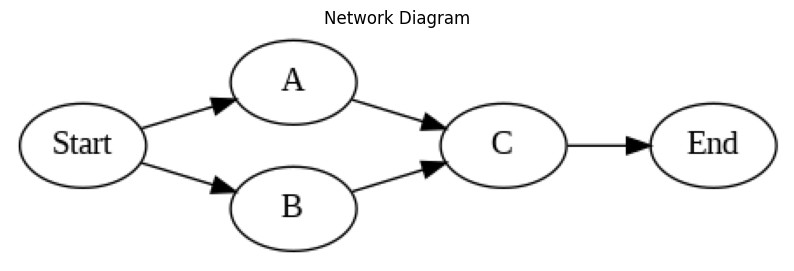

In [ ]:
p.plot_network_diagram(plot_type = 'dot')

In [ ]:
p.create_project_dict()
out_df = pd.DataFrame(p.PROJECT).T

In [ ]:
p.CPM(verbose=True)

FORWARD PASS...

Current task on the iteration = [Start]
The precedence constraints of activity Start are = None
The activity is the [Start] so we continue to the next one, since its start and finish are equal to 0
----------------------------------------------------------------------------------------------------
Current task on the iteration = [A]
The precedence constraints of activity A are = ['Start']
The finish dates of the precedence constraints of activity [A] are = [0]
The start date of activity [A] is the maximun of the finish dates of its precedence constraints which is equal to (0)
The finish date of activity [A] is then the start:(0) plus the duration:(6.0) so the finish date is equal to (6.0)
----------------------------------------------------------------------------------------------------
Current task on the iteration = [B]
The precedence constraints of activity B are = ['Start']
The finish dates of the precedence constraints of activity [B] are = [0]
The start date of 

,ES,EF,LS,LF,F,D
Start,0,0,1.166667,1.166667,0,0
A,0,6.0,1.166667,7.166667,1.166667,6.0
B,0,7.166667,0.0,7.166667,0.0,7.166667
C,7.166667,14.333333,7.166667,14.333333,0.0,7.166667
End,14.333333,14.333333,14.333333,14.333333,0.0,0


In [ ]:
critical_path = p.get_critical_path()
print(critical_path)

['Start', 'B', 'C', 'End']


In [ ]:
total_time = 0
proj_var = 0

for i in range(1, len(critical_path)-1):
    total_time += expected_time[tasks.index(critical_path[i])]
    proj_var += var[tasks.index(critical_path[i])]

print("Total Time : ", total_time)
print("Project Variance : ", proj_var)

Total Time :  14.333333333333334
Project Variance :  2.055555555555556


In [ ]:
guess = int(input("Probability of the Project being completed in ____ days : "))
prob = (guess - total_time) / math.sqrt(proj_var)
probability = (stats.norm.cdf(prob))*100
print("The Probability of the Project being completed in", guess, "days is", probability, "percentage")

Probability of the Project being completed in ____ days : 18
The Probability of the Project being completed in 18 days is 99.47278347165135 percentage
